### Import necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Initializing theta and bias

In [2]:
def initialize(lenw):
    w = np.zeros((1, lenw))
    b = 0
    return w, b

### Hypothesis function

In [3]:
def hypothesis(X, w, b):
    z = np.dot(w, X) + b
    return z

### Cost function

In [4]:
def cost_function(z, y):
    m = y.shape[1]
    J = (1/(2*m))*np.sum(np.square(z-y))
    return J

### Gradient Descent

In [5]:
def gradient_descent(X,y, z):
    m = y.shape[1]
    dz = (z-y)
    dw = (1/m)*np.dot(dz, X.T)
    db = (1/m)*np.sum(dz)
    return dw, db

In [6]:
def gradient_descent_update(w, b, dw, db, learning_rate):
    w = w - learning_rate*dw
    b = b - learning_rate*db
    return w, b

# Linear Regression model

In [7]:
def linear_regression_model(X_train, y_train, X_val, y_val, learning_rate, epochs):
    lenw = X_train.shape[0]
    costs_train = []
    w, b = initialize(lenw)
    for i in range(1, epochs+1):
        z_train = hypothesis(X_train, w, b)
        cost_train = cost_function(z_train, y_train)
        dw, db = gradient_descent(X_train, y_train, z_train)
        w, b = gradient_descent_update(w, b, dw, db, learning_rate)
        if i % 10 == 0:
            costs_train.append(cost_train)

        z_val = hypothesis(X_val, w, b)





        cost_val = cost_function(z_val, y_val)
        if i % 20 == 0:

           print("Epochs "+ str(i)+ '/' + str(epochs)+ ": ")
           print("Training cost " + str(cost_train)+'|'+'Validation cost ' + str(cost_val))


    plt.plot(costs_train)
    plt.xlabel("Iterations")
    plt.ylabel("Training cost")
    plt.title("Learning rate" + str(learning_rate))
    plt.show()
    return w, b

## Uploading the datasets

In [8]:
df = pd.read_csv("../input/linear-reg-woc/Linear_train.csv")
df_test = pd.read_csv("../input/linear-reg-woc/Linear_test.csv")
y = df["label"]
y_tests = df_test["label"]
print(y.shape)
df.drop(df.columns[[0, 21]], axis=1 , inplace=True)
df_test.drop(df_test.columns[[0, 21]], axis=1 , inplace=True)


(50000,)


## Data preprocessing

In [9]:
x_train_scaled = (df - df.mean())/(df.std())

x_test_scaled = (df_test - df_test.mean())/(df_test.std())
x_train = x_train_scaled.values
x_train = x_train.T
print(x_train.shape)

y_train = np.array([y])
print(y_train.shape)
x_test = x_test_scaled.values
x_test = x_test.T
y_test = np.array([y_tests])
print(y_test.shape)

(20, 50000)
(1, 50000)
(1, 10000)


## Fitting with training samples

Epochs 20/1000: 
Training cost 9156104.963681798|Validation cost 8974168.900624376
Epochs 40/1000: 
Training cost 6133413.907488117|Validation cost 6013923.100085973
Epochs 60/1000: 
Training cost 4109012.1212666393|Validation cost 4030937.430134276
Epochs 80/1000: 
Training cost 2753132.199969742|Validation cost 2702472.3747012024
Epochs 100/1000: 
Training cost 1844961.7506186974|Validation cost 1812404.4676446596
Epochs 120/1000: 
Training cost 1236637.4384492089|Validation cost 1215997.0209780321
Epochs 140/1000: 
Training cost 829140.1708947761|Validation cost 816314.3931089336
Epochs 160/1000: 
Training cost 556156.9232843972|Validation cost 548430.6844440618
Epochs 180/1000: 
Training cost 373275.70512189204|Validation cost 368856.4496702369
Epochs 200/1000: 
Training cost 250750.88456230558|Validation cost 248458.8160135701
Epochs 220/1000: 
Training cost 168658.86358484597|Validation cost 167720.52125019464
Epochs 240/1000: 
Training cost 113654.16810211212|Validation cost 113

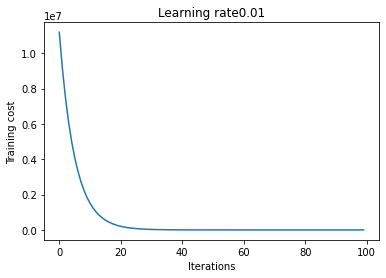

In [10]:
w, b = linear_regression_model(x_train, y_train, x_test, y_test, 0.01, 1000)

In [11]:
targets = y_test
predictions1 = hypothesis(x_test, w, b)

## Root mean squared error

In [12]:
def rmse(predictions1, targets):
    return np.sqrt((np.square(predictions1 - targets)).mean())
rms_error = rmse(predictions1, targets)
print("rmse_error = ", rms_error)

rmse_error =  74.71750188869333


## Root mean squared error from Sklearn module

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train.T, y_train.T)
predictions = model.predict(x_test.T)
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test.T, predictions)
lin_rmse = np.sqrt(lin_mse)
print("rmse_error using sckit-learn model: ", lin_rmse)

rmse_error using sckit-learn model:  74.71076911539595
